Erin progress as of 11/29/2020

Youtube resources:
   
   https://youtu.be/j-3vuBynnOE (all of this one)
    
   https://www.youtube.com/watch?v=WvoLTXIjBYU&t=797s (this one at around 7 minutes - just for bring the data into tensorflow)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as image 
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [105]:
Categories = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"] #file names
#Directory=os.path.join('c:','\\', 'Users', 'ErinS', 'Downloads', 'CMSE202', 'repos', 'bigbrain202proj','MTImages') #add where it is on yours

In [106]:
FilePath = os.path.abspath("FinalProjectProgressErin.ipynb")
FileDirectory = os.path.dirname(FilePath)
Directory = os.path.join(FileDirectory, 'MTImages')
print(Directory)

S:\cmse_202_proj1\MTImages


In [107]:
os.path.isdir(Directory) # check that path is correct

True

In [108]:
Data = []
def create_data():
    for Cat in Categories:
        Path = os.path.join(Directory, Cat)
        class_num = Categories.index(Cat)
        for Image in os.listdir(Path):
            if Image.endswith(".png"):
                ImageArray = plt.imread(os.path.join(Path, Image))
                NewImageArray = resize(ImageArray, (200,200), anti_aliasing = True)
                Data.append([NewImageArray, class_num])
            else:
                next
            
    

In [109]:
create_data()

In [110]:
print(len(Data))

465


In [111]:
np.random.shuffle(Data)

In [112]:
print(Data)

[[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 1], [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 3], [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 3], [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0.

In [140]:
Features = []
Labels = []
for features, labels in Data:
    Features.append(features)
    Labels.append(labels)

Features = np.array(Features).reshape(-1, 200, 200)
FeatTrain, FeatTest, ClassTrain, ClassTest = train_test_split(Features, Labels, test_size = 0.25)


In [141]:
for i in range(5):
    print(ClassTest[i])

2
0
0
0
1


In [144]:
FeatTrain[6].shape

(200, 200)

1


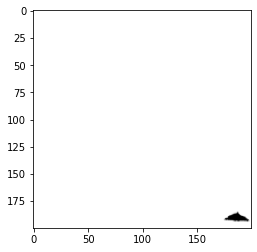

0


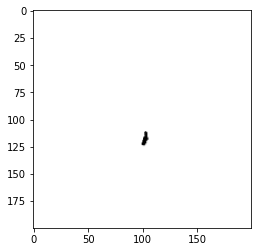

0


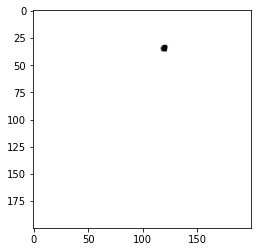

0


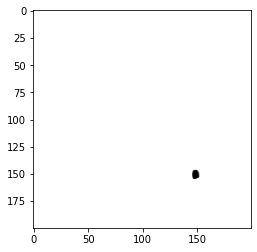

1


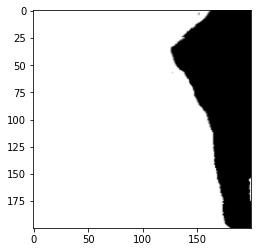

In [146]:
for i in range(5):
    plt.figure()
    digit = FeatTrain[i]
    print(ClassTrain[i])
    plt.imshow(digit, cmap=plt.cm.binary)
    ClassTrain[6]
    plt.show()

In [148]:
FeatTrain = FeatTrain/255
FeatTest = FeatTest/255

In [172]:
ClassTrain = to_categorical(ClassTrain)
ClassTest = to_categorical(ClassTest)

In [174]:
ClassTest.shape

(117, 6)

In [180]:
network = Sequential()
network.add(Flatten())

network.add(Dense(128, input_dim=200*200, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(128, activation='relu'))

network.add(Dense(6, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [181]:
#at this around 19, val_loss going up, so it is a sign of overfit, we stop at 18
#history=network.fit(FeatTrain, ClassTrain, epochs=20,  validation_split=0.1) #lots of epochs because this set is small - only takes a minute or so for me

In [182]:
history=network.fit(FeatTrain, ClassTrain, epochs=18,  validation_split=0.1) #lots of epochs because this set is small - only takes a minute or so for me

Epoch 1/18
10/10 [==============================] - 0s 47ms/step - loss: 1.6030 - accuracy: 0.3450 - val_loss: 1.4131 - val_accuracy: 0.5714
Epoch 2/18
10/10 [==============================] - 0s 36ms/step - loss: 1.3129 - accuracy: 0.5335 - val_loss: 1.3014 - val_accuracy: 0.6000
Epoch 3/18
10/10 [==============================] - 0s 37ms/step - loss: 1.1705 - accuracy: 0.6134 - val_loss: 1.1829 - val_accuracy: 0.5714
Epoch 4/18
10/10 [==============================] - 0s 36ms/step - loss: 1.0498 - accuracy: 0.6198 - val_loss: 1.0932 - val_accuracy: 0.5714
Epoch 5/18
10/10 [==============================] - 0s 37ms/step - loss: 0.9519 - accuracy: 0.6198 - val_loss: 1.0294 - val_accuracy: 0.5714
Epoch 6/18
10/10 [==============================] - 0s 37ms/step - loss: 0.8825 - accuracy: 0.6198 - val_loss: 0.9970 - val_accuracy: 0.5714
Epoch 7/18
10/10 [==============================] - 0s 36ms/step - loss: 0.8208 - accuracy: 0.6358 - val_loss: 0.9641 - val_accuracy: 0.6286
Epoch 8/18
10

In [184]:
test_loss, test_acc = network.evaluate(FeatTest, ClassTest)
print('test_acc:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.7863
test_acc: 0.7863247990608215


In [196]:
values = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"]
keys = [0,1,2,3,4,5]
dic = dict(zip(keys, values)) 

In [198]:



def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        
        p_title = dic[np.argmax(pred_titles[i])]
        plt.title('Pred='+p_title , size=9) #str(pred_titles[i])
        
        actual_title = dic[np.argmax(true_titles[i])]
        plt.xlabel('Actual='+ actual_title, size=9)#str(true_titles[i])
        
        plt.xticks(())
        plt.yticks(())

pred_labels = network.predict(FeatTest)
#FeatTrain, FeatTest, ClassTrain, ClassTest = train_test_split(Features, Labels, test_size = 0.25)


In [195]:


# for i in range(5):
#     ary = pred_labels[i]
#     print(ary.round())
#     print(type(ary))
#     index = np.argmax(ary)
#     print(index)
#     print(dic[index])

[0. 0. 1. 0. 0. 0.]
<class 'numpy.ndarray'>
2
Crack
[0. 0. 0. 0. 1. 0.]
<class 'numpy.ndarray'>
4
Free
[1. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
0
Blowhole
[1. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
0
Blowhole
[0. 1. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
1
Break


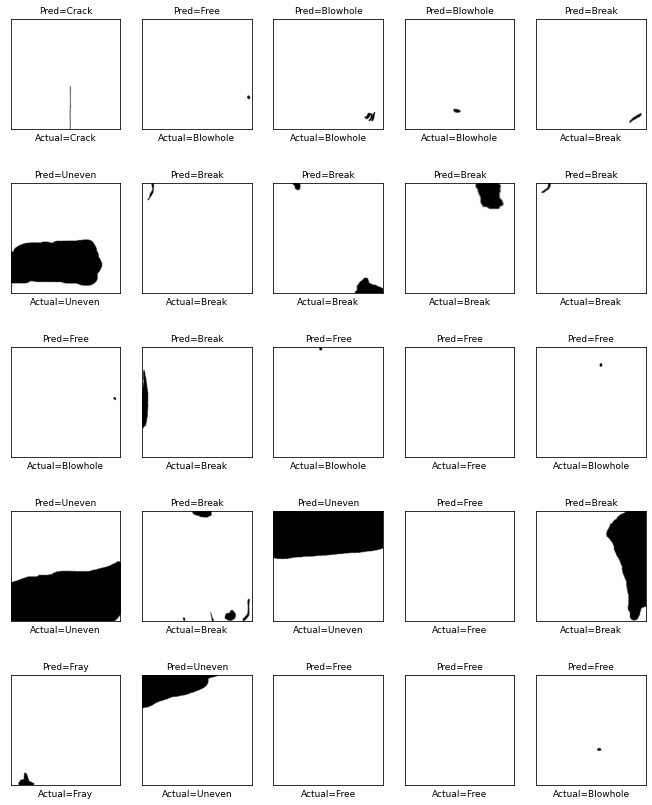

In [199]:
plot_gallery(FeatTest, ClassTest, pred_labels, 200,200)